# Imports

In [1]:
import os

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%pip install roboflow
from roboflow import Roboflow

In [4]:
%pip install ultralytics
import ultralytics
from ultralytics import YOLO

  Using cached ultralytics-8.3.179-py3-none-any.whl.metadata (37 kB)
  Using cached ultralytics_thop-2.0.15-py3-none-any.whl.metadata (14 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.m

In [27]:
from IPython.display import Image, display
import glob
import matplotlib.image as mpimg

# Constants

In [19]:
DATA_YAML_PATH = "data.yaml"
PROJECT_FOLDER = "run-yolov8-training"
NAME = "exp1"

# Initialization

In [6]:
ultralytics.checks()

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.9/112.6 GB disk)


# Functions

In [7]:
def create_file(path, data):
    with open(path, 'w') as f:
        f.write(data)

# Dataset

https://universe.roboflow.com/roboflow-58fyf/rock-paper-scissors-sxsw/dataset/12

In [8]:
rf = Roboflow(api_key="AE4x6F2UzA8PofP1XkmV")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(12)
dataset = version.download("yolov8-obb")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rock-paper-scissors-12 in yolov8-obb:: 100%|██████████| 23784/23784 [00:03<00:00, 6230.83it/s] 


In [9]:
DATASET_FOLDER = f"{dataset.name}-{dataset.version}"
print(f"Dataset path: {DATASET_FOLDER}")

Dataset path: rock-paper-scissors-12


# Model Training

In [11]:
yaml_content = f"""

train: {DATASET_FOLDER}/train/images
val: {DATASET_FOLDER}/valid/images
test: {DATASET_FOLDER}/test/images

nc: 3

names:
  - Paper
  - Rock
  - Scissor
""".strip()

create_file(DATA_YAML_PATH, yaml_content)

In [12]:
# !yolo task=detect mode=train data={DATA_YAML_PATH} model=yolov8n.pt epochs=10 imgsz=640 batch=16 project={PROJECT_FOLDER} name="exp1"

In [13]:
model = YOLO("yolov8n.pt")
results = model.train(
    data=DATA_YAML_PATH,
    epochs=10,
    imgsz=640,
    batch=16,
    project=PROJECT_FOLDER,
    name=NAME
)

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1043.0±364.9 MB/s, size: 42.2 KB)


train: Scanning /content/rock-paper-scissors-12/train/labels... 10953 images, 4269 backgrounds, 0 corrupt: 100%|██████████| 10953/10953 [00:04<00:00, 2251.53it/s]


train: New cache created: /content/rock-paper-scissors-12/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 784.1±736.7 MB/s, size: 42.9 KB)


val: Scanning /content/rock-paper-scissors-12/valid/labels... 604 images, 251 backgrounds, 0 corrupt: 100%|██████████| 604/604 [00:00<00:00, 1397.29it/s]

val: New cache created: /content/rock-paper-scissors-12/valid/labels.cache


Plotting labels to run-yolov8-training/exp1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to run-yolov8-training/exp1
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.04G      1.243      3.158      1.479          6        640: 100%|██████████| 685/685 [03:41<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.87it/s]


                   all        604        418      0.405      0.383      0.349      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.5G      1.273      1.698      1.444          7        640: 100%|██████████| 685/685 [03:34<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.27it/s]

                   all        604        418      0.737      0.692      0.759      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.53G      1.214      1.392      1.412          5        640: 100%|██████████| 685/685 [03:32<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  3.93it/s]

                   all        604        418      0.783      0.675      0.785       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.54G      1.156      1.169      1.359          6        640: 100%|██████████| 685/685 [03:33<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  3.97it/s]

                   all        604        418      0.824      0.771      0.854      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.57G      1.038     0.9546      1.262          5        640: 100%|██████████| 685/685 [03:37<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all        604        418      0.865      0.854      0.903      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.58G     0.9705     0.8125      1.209          3        640: 100%|██████████| 685/685 [03:39<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  3.85it/s]

                   all        604        418      0.898      0.866      0.912      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       2.6G     0.9105     0.7054      1.172          8        640: 100%|██████████| 685/685 [03:39<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.16it/s]

                   all        604        418      0.903      0.897      0.918      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.61G      0.843     0.6241      1.129          5        640: 100%|██████████| 685/685 [03:33<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.23it/s]

                   all        604        418      0.927      0.905      0.937      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.63G     0.7838     0.5566      1.093          6        640: 100%|██████████| 685/685 [03:31<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  3.07it/s]

                   all        604        418      0.933      0.904      0.947      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.65G     0.7252     0.4813      1.052          6        640: 100%|██████████| 685/685 [03:30<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:05<00:00,  3.39it/s]

                   all        604        418      0.948      0.923       0.95      0.751



10 epochs completed in 0.616 hours.
Optimizer stripped from run-yolov8-training/exp1/weights/last.pt, 6.2MB
Optimizer stripped from run-yolov8-training/exp1/weights/best.pt, 6.2MB

Validating run-yolov8-training/exp1/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.43it/s]


                   all        604        418      0.948      0.923       0.95      0.751
                 Paper        139        146      0.932      0.904      0.952      0.748
                  Rock        128        150      0.972      0.923      0.941      0.714
               Scissor        118        122      0.941      0.943      0.958      0.791
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to run-yolov8-training/exp1


# History

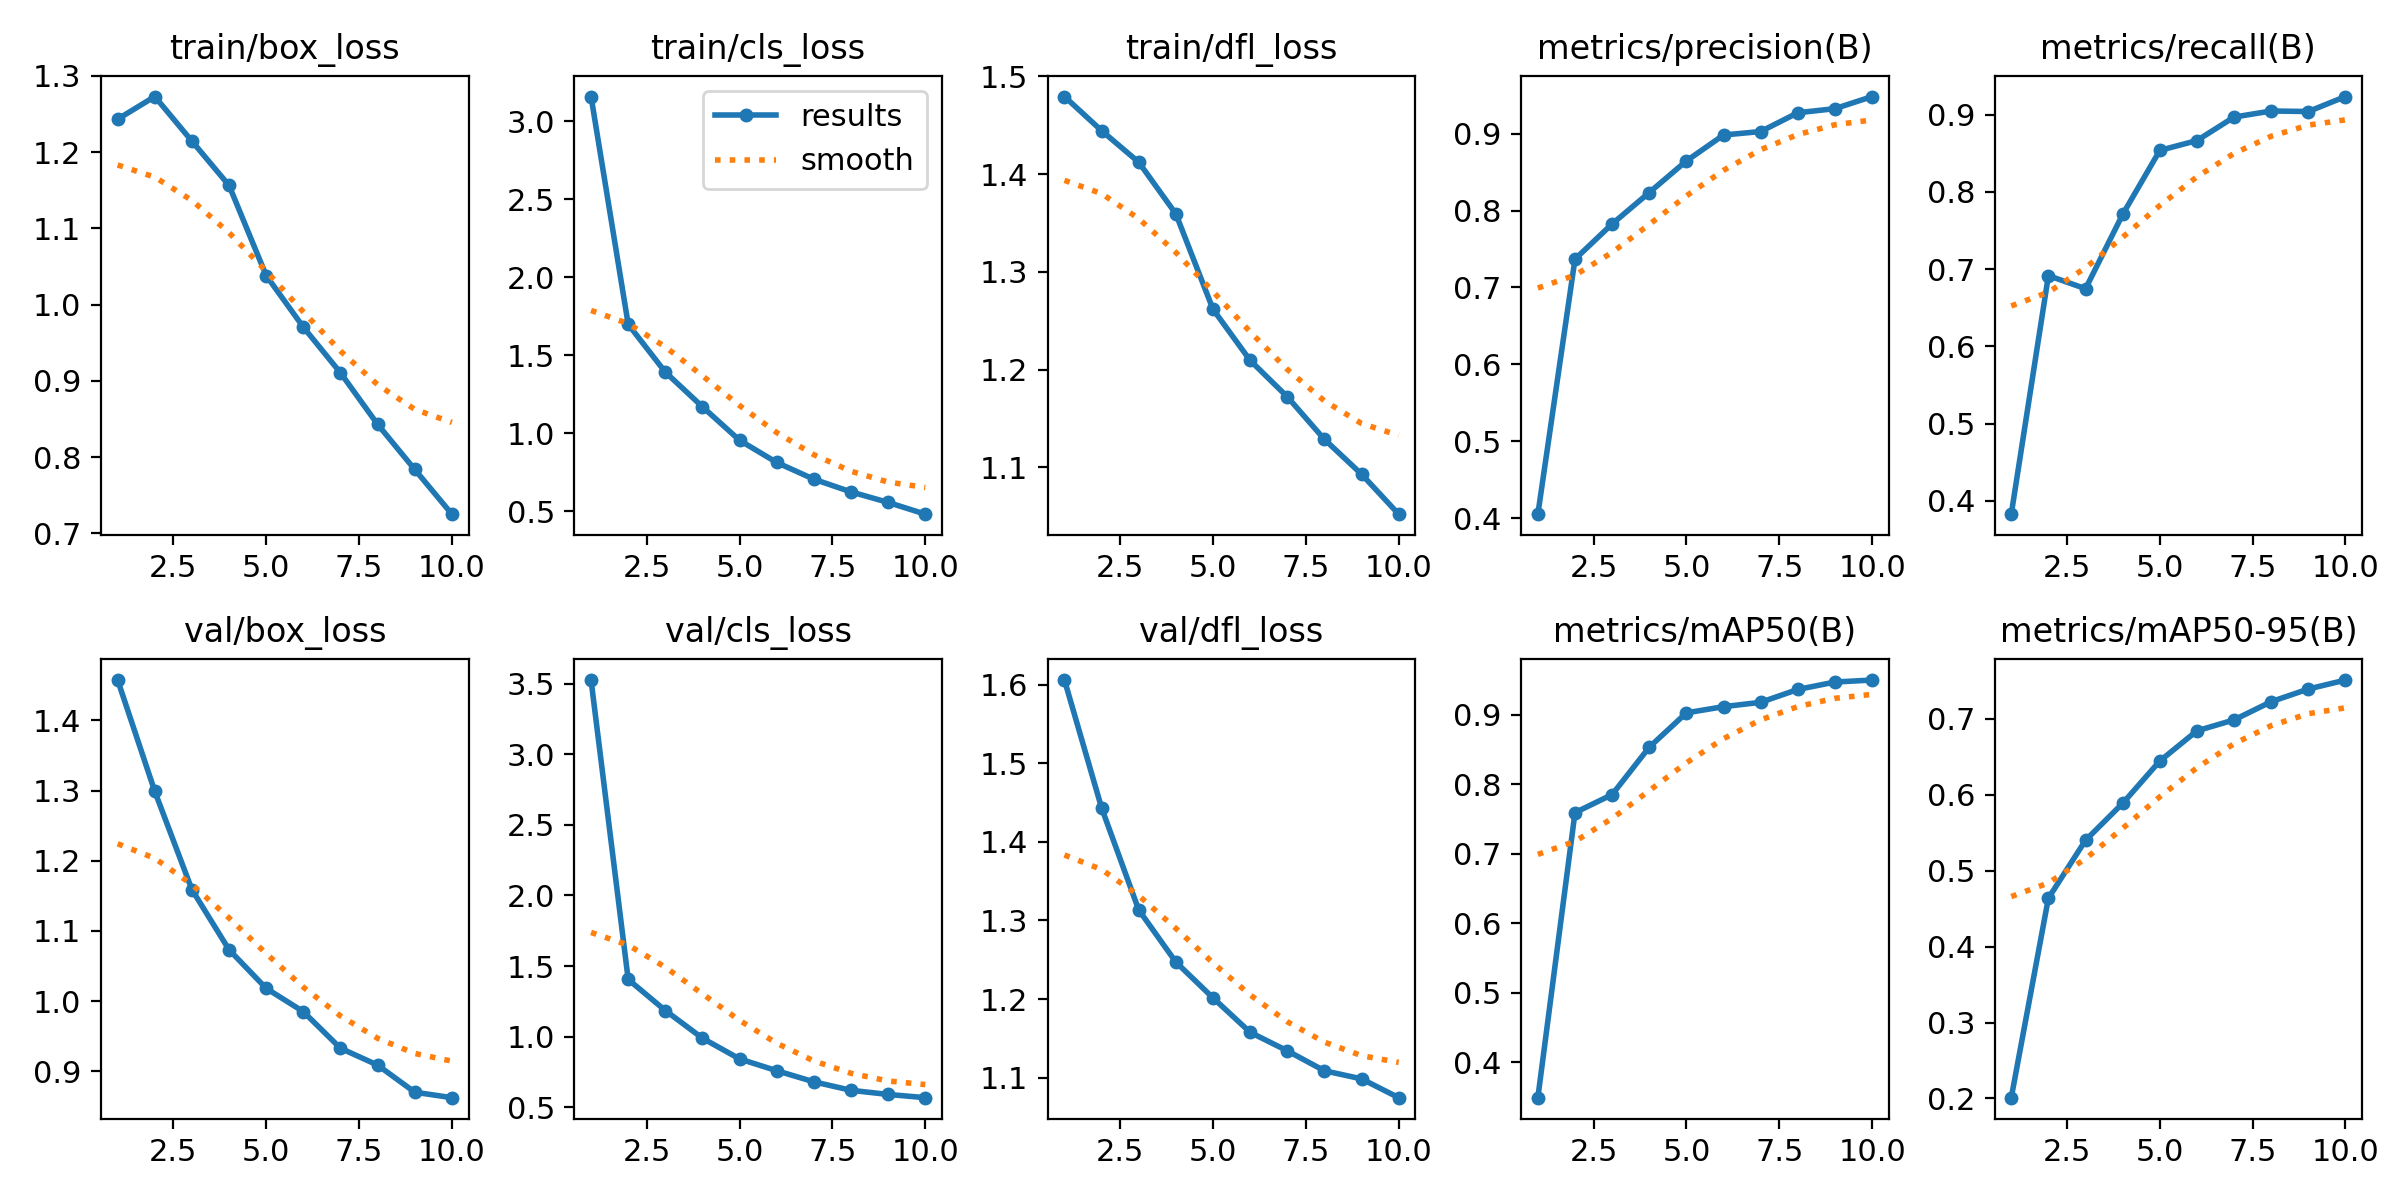

In [20]:
display(Image(filename=f"{PROJECT_FOLDER}/{NAME}/results.png", width=1000))

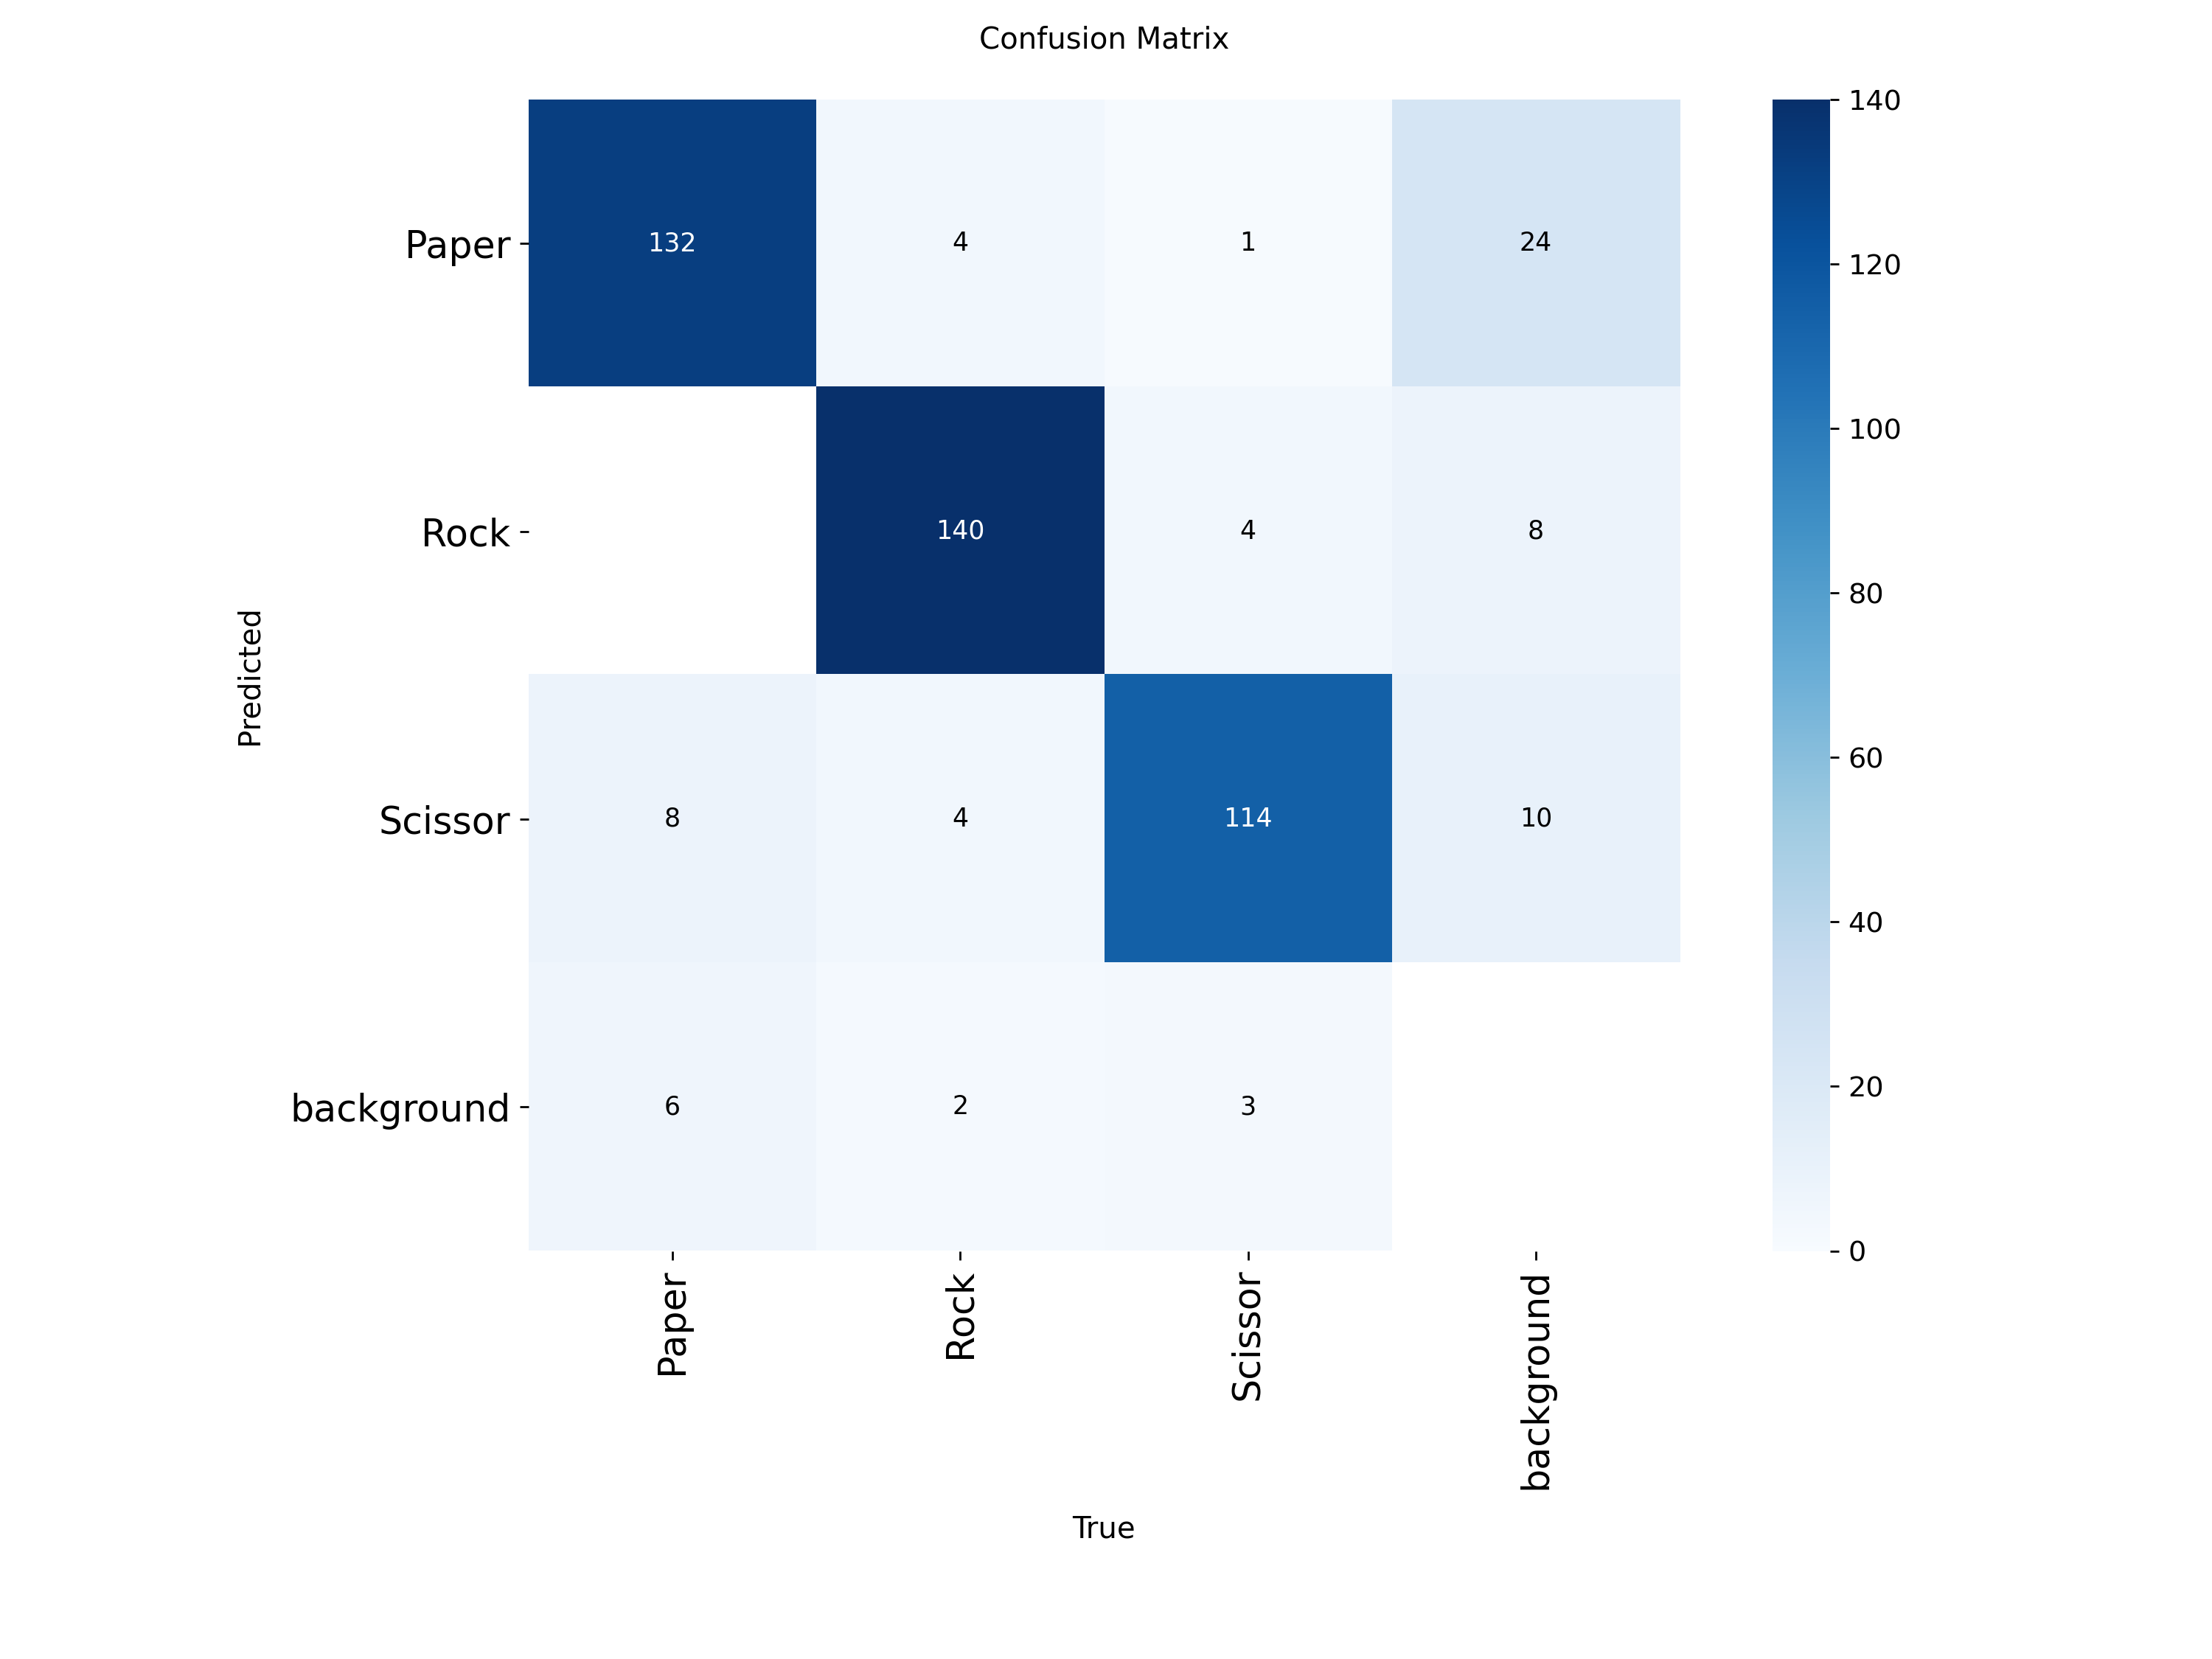

In [21]:
display(Image(filename=f"{PROJECT_FOLDER}/{NAME}/confusion_matrix.png", width=1000))

# Testing

In [25]:
model = YOLO(f"{PROJECT_FOLDER}/{NAME}/weights/best.pt")

results = model.predict(
    source=f"{DATASET_FOLDER}/test/images",
    imgsz=640,
    conf=0.5,
    save=True
)


image 1/329 /content/rock-paper-scissors-12/test/images/10e0gvm_jpg.rf.3b68a834fab647f30a57fc3ea92d4cd2.jpg: 640x640 (no detections), 10.5ms
image 2/329 /content/rock-paper-scissors-12/test/images/15208484cellblock_jpg.rf.95cbda1e169a66105fbf2aa22959a73b.jpg: 640x640 (no detections), 11.7ms
image 3/329 /content/rock-paper-scissors-12/test/images/19171_298_298_1_0_jpg.rf.0024dfb25d7b5a13a78e94fca47ef004.jpg: 640x640 (no detections), 12.6ms
image 4/329 /content/rock-paper-scissors-12/test/images/20061004021831_jpg.rf.8667d8aa5599deb901289c024eed4313.jpg: 640x640 (no detections), 7.6ms
image 5/329 /content/rock-paper-scissors-12/test/images/20220216_221550_jpg.rf.02a071a383151953fcf8671fc7fca3af.jpg: 640x640 1 Scissor, 7.2ms
image 6/329 /content/rock-paper-scissors-12/test/images/20220216_221819_jpg.rf.295ebb583293f91f74e1700f0ab0639a.jpg: 640x640 1 Rock, 7.2ms
image 7/329 /content/rock-paper-scissors-12/test/images/20220216_221856_jpg.rf.c551cb3856f480cba36d6aa58e3300cd.jpg: 640x640 1 R

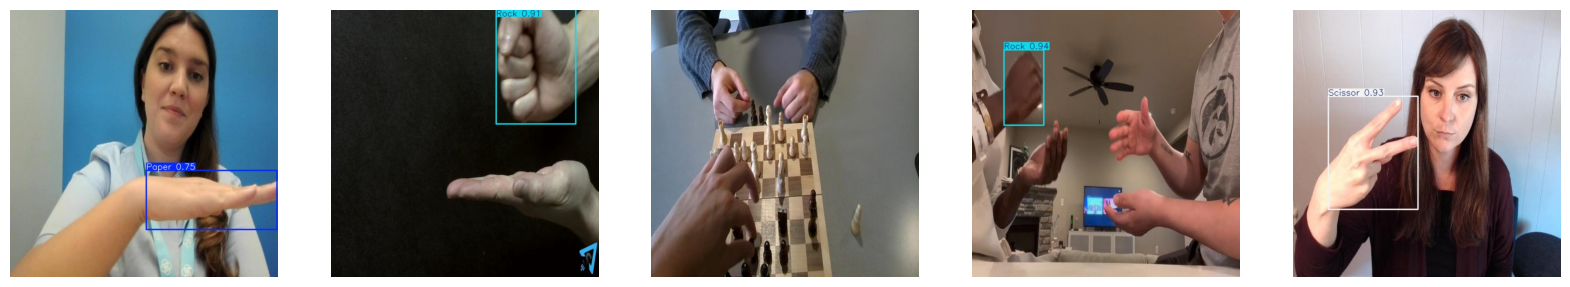

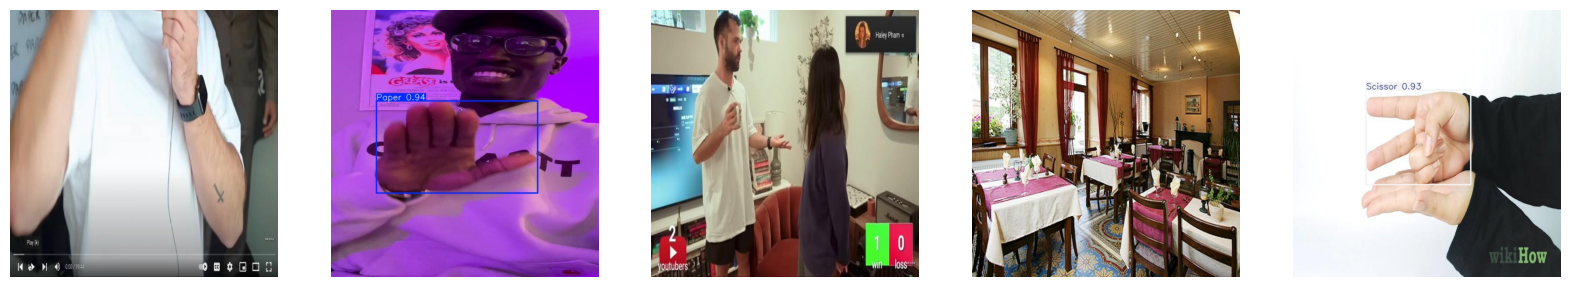

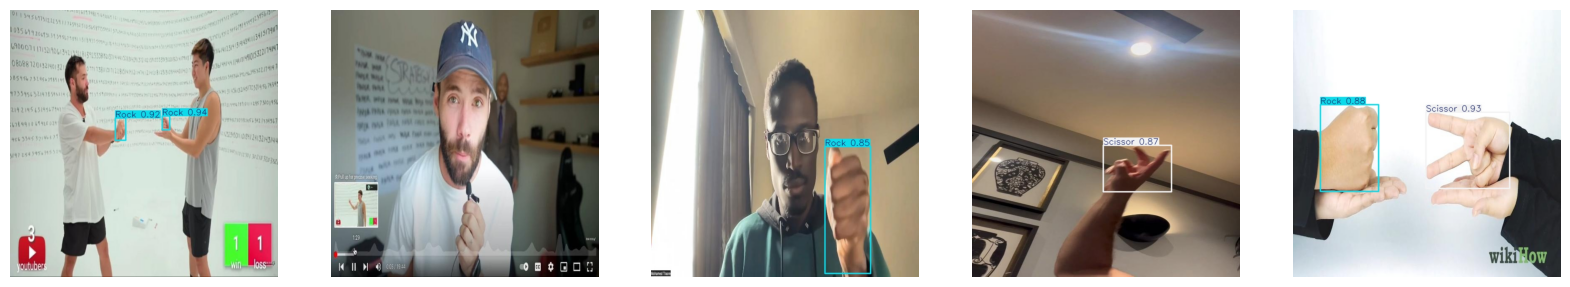

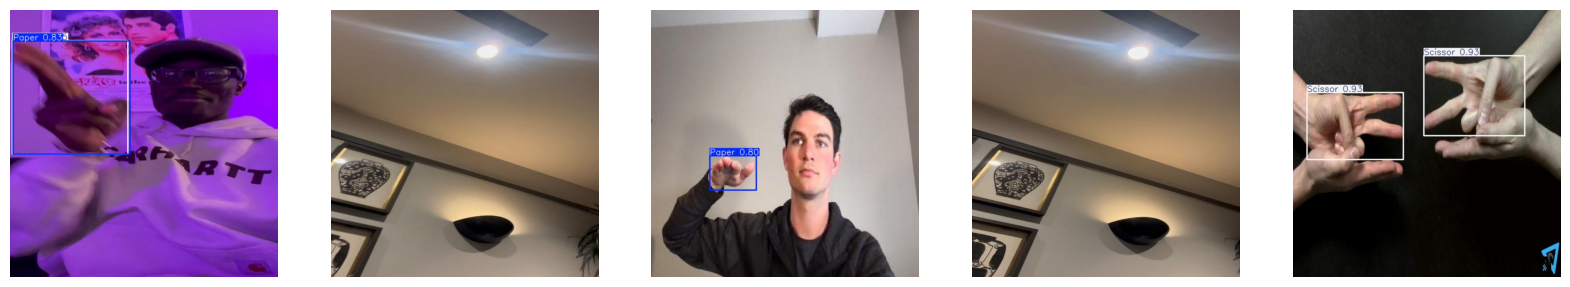

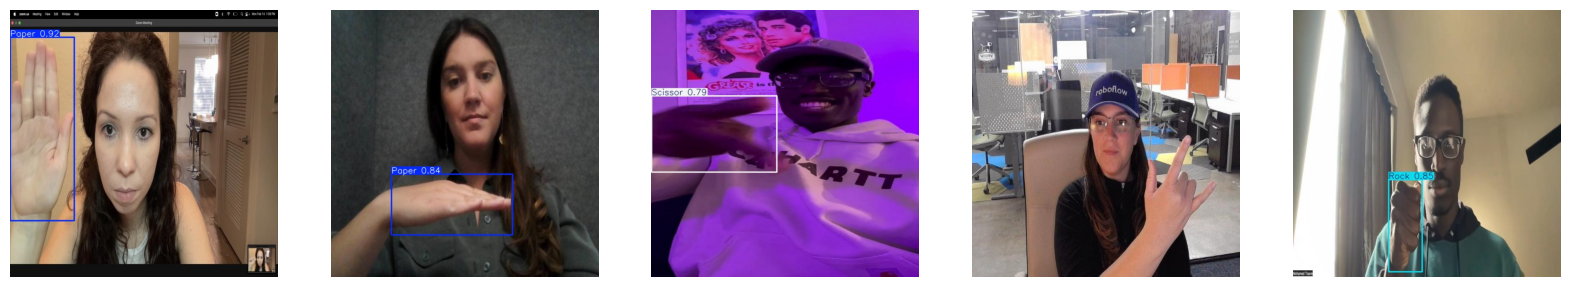

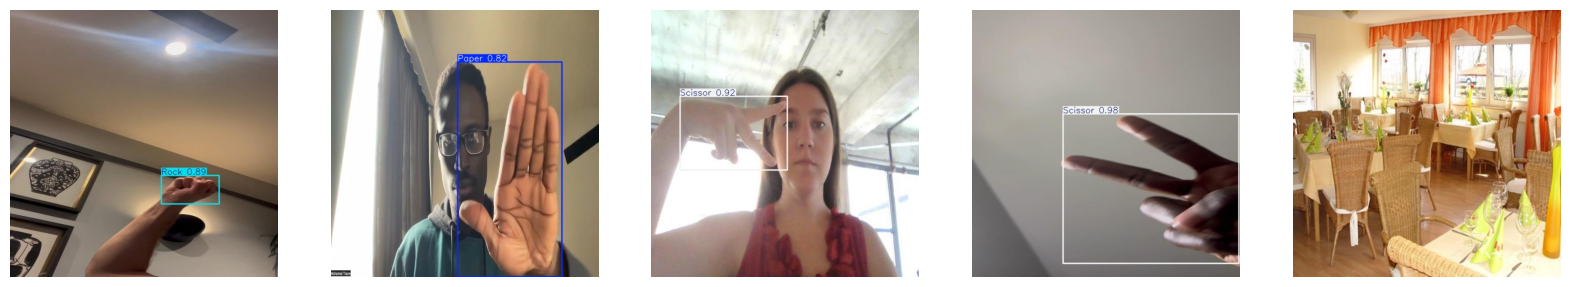

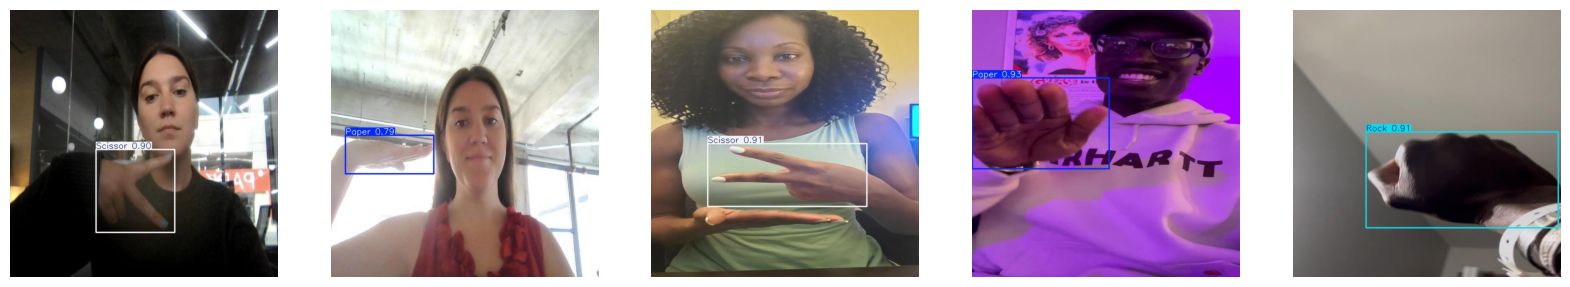

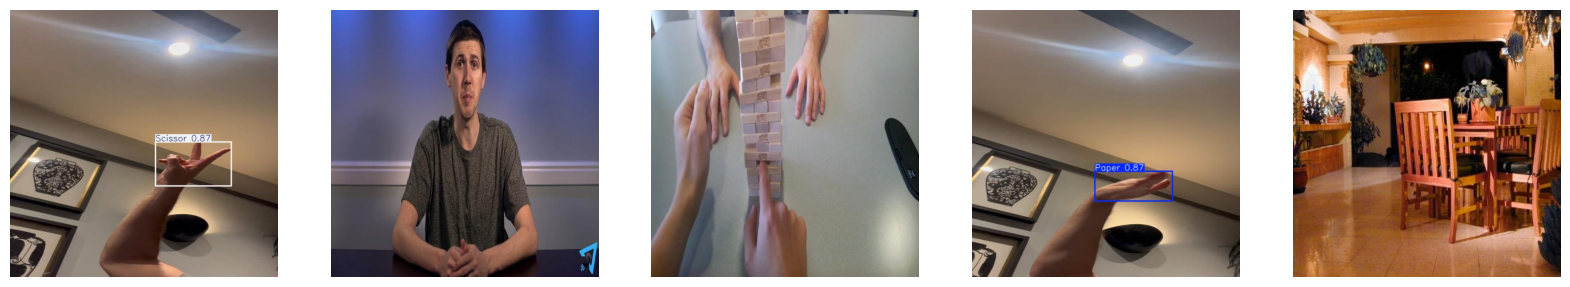

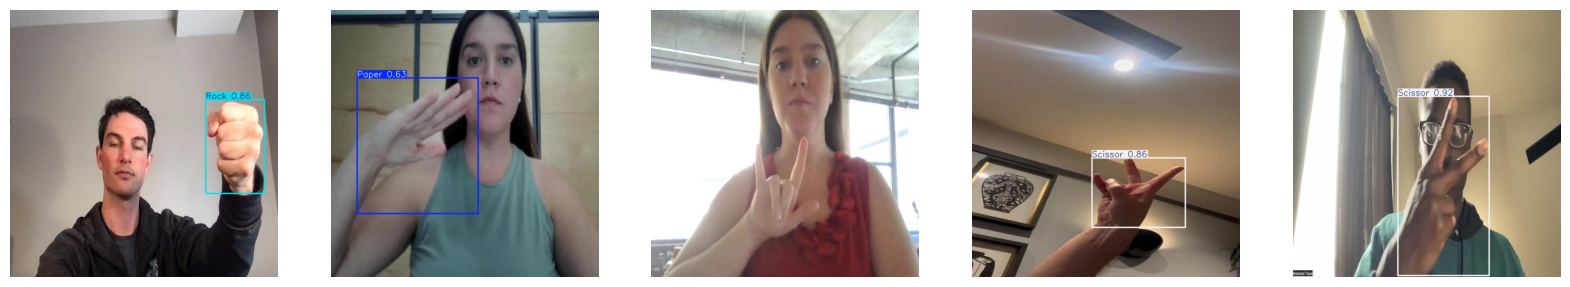

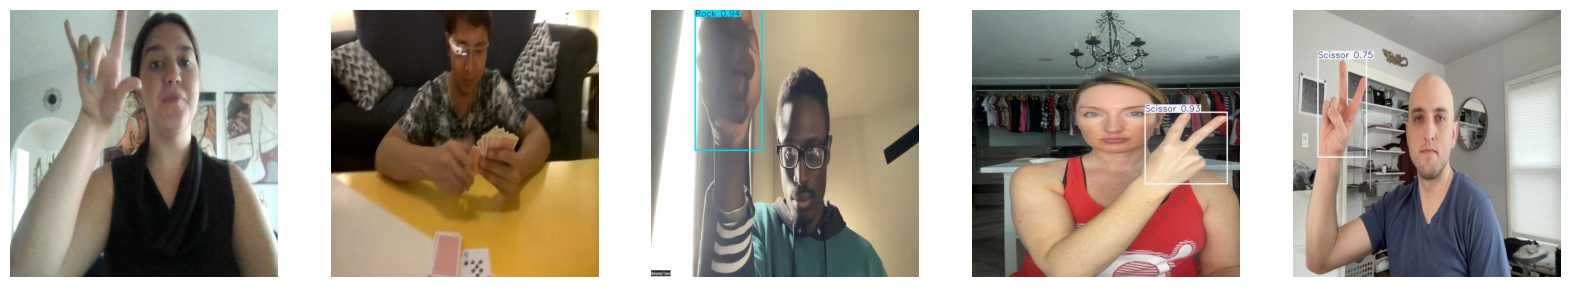

In [33]:
N_COLS = 5
image_paths = glob.glob("runs/detect/predict/*.jpg")
N_ROWS = (len(image_paths) + N_COLS - 1) // N_COLS
LIMIT_ROWS = 10

np.random.shuffle(image_paths)

for row in range(N_ROWS):
    if row >= LIMIT_ROWS:
        break

    fig, axes = plt.subplots(1, N_COLS, figsize=(20, 5))

    for col in range(N_COLS):
        idx = row * N_COLS + col

        if idx < len(image_paths):
            img = mpimg.imread(image_paths[idx])
            axes[col].imshow(img)
            axes[col].axis("off")
        else:
            axes[col].axis("off")
    plt.show()
